## Coursera Capstone: Toronto Neighborhoud Clustering

### Getting Toronto neighborhoud list by scraping "List of postal codes of Canada" from Wikipedia, usinh BeautifulSoup

First, let's import the needed modules

In [134]:
from bs4 import BeautifulSoup as bs
import requests as rq
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Request module has been used to get the body of Wikipedia HTML file as Text. BeautifulSoup Module is used to parse the HTML.

In [135]:
source = rq.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = bs(source, 'lxml')

-----

The table consisting of the Postcode is selected this table is of 'wikitable sortable' class.

In [136]:
table = soup.find_all('table', {'class':'wikitable sortable'})

Next, tags containing the postcode, borough, and neighborhoud is captured and appended to datafarame.

In [137]:
full = pd.DataFrame(columns = ["Postcode", "Borough", "Neighborhood"])
for index, row in enumerate(soup.find('table', {'class':'wikitable sortable'}).find_all('tr')):
#     print(index, row)
    data = row.find_all(['td'])
    try:
        Postcode = data[0].text
        Borough = data[1].text
        Neighbourhood = data[2].text.strip('\n')
        cells = [Postcode, Borough,Neighbourhood]
        full.loc[index] = cells
        
    except IndexError:pass
full = full.loc[full['Borough'] != 'Not assigned']    


Rows from the extracted table grouped into a new dataframe. Neighbourhood sharing same Postcode have joined together. 

In [138]:
full_grouped = full.groupby(['Postcode', "Borough"])[["Neighborhood"]].agg(lambda col: ', '.join(col))\
.sort_values('Postcode').reset_index()

In [139]:
full_grouped

,Postcode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [140]:
full_grouped.shape

(103, 3)

-------

## Adding Long-Lat for Postal Codes

In [141]:
codes = pd.read_csv('/Users/newcomputer/Projects/Coursera/Geospatial_Coordinates.csv')

In [142]:
codes.rename(columns={"Postal Code": "Postcode"}, inplace = True)

In [226]:
toronto_data = pd.merge(full_grouped, codes, on ='Postcode')[:100]

In [227]:
toronto_data

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


## Populating the Map

Adding neighborhood on top of the map

In [228]:
import requests
import numpy as np
from sklearn.cluster import KMeans


In [229]:

latitude = 43.6532
longitude = -79.3832
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6532, -79.3832.


In [230]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors


map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], \
                                           neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_toronto)  
    
map_toronto

In [231]:
CLIENT_ID = 'J1CT2BCEGDHXVWLBN1FUQQ2PUWJCVDDNOLDOOAQXOFZTU4LS' # your Foursquare ID
CLIENT_SECRET = 'XC1NMUQSMROQUARL5CQYUCPQF3UDTBMTEPTV0CZIOL3QF2UO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: J1CT2BCEGDHXVWLBN1FUQQ3PUWJCVDDNOLDOOAQXOFZTU4LS
CLIENT_SECRET:XC1NMUQSMROQUARL5CQYUCPQF3UDTBMTEPTV0CZIOL3QF2UO


In [232]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [233]:
toronto_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )




Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West, Steeles West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens, Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The D

In [234]:
print(toronto_venues.shape)
toronto_venues.head()

(2253, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,Wendy's,43.807448,-79.199056,Fast Food Restaurant
1,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Chris Effects Painting,43.784343,-79.163742,Construction & Landscaping
2,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Swiss Chalet Rotisserie & Grill,43.767697,-79.189914,Pizza Place
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store


In [235]:
toronto_venues.groupby('Neighborhood').count().reset_index()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Adelaide, King, Richmond",100,100,100,100,100,100
1,Agincourt,4,4,4,4,4,4
2,"Agincourt North, L'Amoreaux East, Milliken, St...",3,3,3,3,3,3
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",13,13,13,13,13,13
4,"Alderwood, Long Branch",11,11,11,11,11,11
5,"Bathurst Manor, Downsview North, Wilson Heights",18,18,18,18,18,18
6,Bayview Village,4,4,4,4,4,4
7,"Bedford Park, Lawrence Manor East",25,25,25,25,25,25
8,Berczy Park,55,55,55,55,55,55
9,"Birch Cliff, Cliffside West",4,4,4,4,4,4


In [236]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 273 uniques categories.


## Analyze Each Neighborhood


In [237]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix=" ", prefix_sep=" ")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,Fraternity House,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Movie Theater,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Piano Bar,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Rock Climbing Spot,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [238]:
toronto_onehot.shape

(2253, 274)

In [239]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,Fraternity House,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Movie Theater,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Piano Bar,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Rock Climbing Spot,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,"Adelaide, King, Richmond",0.000000,0.000000,0.000000,0.000000,0.000

In [240]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
                   venue  freq
0            Coffee Shop  0.07
1                   Café  0.05
2             Steakhouse  0.04
3        Thai Restaurant  0.04
4    American Restaurant  0.04


----Agincourt----
                      venue  freq
0    Furniture / Home Store  0.25
1                    Lounge  0.25
2            Breakfast Spot  0.25
3              Skating Rink  0.25
4         Accessories Store  0.00


----Agincourt North, L'Amoreaux East, Milliken, Steeles East----
                         venue  freq
0                   Playground  0.33
1                         Park  0.33
2             Sculpture Garden  0.33
3            Accessories Store  0.00
4    Middle Eastern Restaurant  0.00


----Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown----
              venue  freq
0       Pizza Place  0.15
1     Grocery Store  0.15
2       Coffee Shop  0.08
3    Discount Store  0.08
4    Sandwich Plac

                  venue  freq
0                  Park  0.50
1     Convenience Store  0.25
2           Coffee Shop  0.25
3     Accessories Store  0.00
4    Miscellaneous Shop  0.00


----Emery, Humberlea----
                               venue  freq
0                     Baseball Field   1.0
1                  Accessories Store   0.0
2                              Motel   0.0
3                Monument / Landmark   0.0
4    Molecular Gastronomy Restaurant   0.0


----Fairview, Henry Farm, Oriole----
                    venue  freq
0          Clothing Store  0.12
1    Fast Food Restaurant  0.09
2             Coffee Shop  0.06
3              Restaurant  0.05
4                Tea Room  0.03


----First Canadian Place, Underground city----
           venue  freq
0    Coffee Shop  0.11
1           Café  0.08
2          Hotel  0.06
3     Restaurant  0.05
4     Steakhouse  0.04


----Flemingdon Park, Don Mills South----
                  venue  freq
0            Beer Store  0.10
1             

                         venue  freq
0                   Playground   0.5
1            Convenience Store   0.5
2            Accessories Store   0.0
3    Middle Eastern Restaurant   0.0
4                Movie Theater   0.0


----Silver Hills, York Mills----
                        venue  freq
0           Martial Arts Dojo   0.5
1                   Cafeteria   0.5
2              Massage Studio   0.0
3              Medical Center   0.0
4    Mediterranean Restaurant   0.0


----St. James Town----
           venue  freq
0    Coffee Shop  0.07
1           Café  0.06
2     Restaurant  0.06
3          Hotel  0.05
4           Park  0.03


----Stn A PO Boxes 25 The Esplanade----
            venue  freq
0     Coffee Shop  0.10
1            Café  0.04
2      Restaurant  0.04
3    Cocktail Bar  0.03
4           Hotel  0.03


----Studio District----
                  venue  freq
0                  Café  0.10
1           Coffee Shop  0.07
2    Italian Restaurant  0.05
3                Bakery  0.05
4 

In [241]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [255]:
num_top_venues = 20

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :],\
                                                                          num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Thai Restaurant,Steakhouse,American Restaurant,Hotel,Gym,Clothing Store,Bar,Restaurant,Sushi Restaurant,Japanese Restaurant,Bakery,Asian Restaurant,Burger Joint,Pizza Place,Breakfast Spot,Salad Place,Bookstore,Cosmetics Shop
1,Agincourt,Lounge,Skating Rink,Breakfast Spot,Furniture / Home Store,Yoga Studio,Dumpling Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Empanada Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Discount Store,Diner,Fast Food Restaurant,Creperie
2,"Agincourt North, L'Amoreaux East, Milliken, St...",Park,Playground,Sculpture Garden,Yoga Studio,Dumpling Restaurant,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Dim Sum Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Diner,Department Store,Dessert Shop
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",Grocery Store,Pizza Place,Fried Chicken Joint,Fast Food Restaurant,Discount Store,Pharmacy,Coffee Shop,Video Store,Japanese Restaurant,Beer Store,Sandwich Place,Donut Shop,Dog Run,Doner Restaurant,Yoga Studio,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Diner,Empanada Restaurant
4,"Alderwood, Long Branch",Pizza Place,Gym,Sandwich Place,Skating Rink,Coffee Shop,Bank,Pharmacy,Athletics & Sports,Pub,Pool,Diner,Discount Store,Dog Run,Donut Shop,Doner Restaurant,Dessert Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
5,"Bathurst Manor, Downsview North, Wilson Heights",Coffee Shop,Grocery Store,Frozen Yogurt Shop,Shopping Mall,Fast Food Restaurant,Bridal Shop,Sandwich Place,Diner,Bank,Restaurant,Middle Eastern Restaurant,Sushi Restaurant,Fried Chicken Joint,Deli / Bodega,Video Store,Pharmacy,Pizza Place,Comfort Food Restaurant,Dumpling Restaurant,Drugstore
6,Bayview Village,Café,Japanese Restaurant,Chinese Restaurant,Bank,Yoga Studio,Dumpling Restaurant,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Discount Store,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Dog Run,Diner
7,"Bedford Park, Lawrence Manor East",Coffee Shop,Italian Restaurant,Fast Food Restaurant,Sushi Restaurant,Pizza Place,Sandwich Place,Restaurant,Butcher,Café,Pub,Greek Restaurant,Pharmacy,Comfort Food Restaurant,Liquor Store,Juice Bar,Indian Restaurant,Hardware Store,Breakfast Spot,Grocery Store,Thai Restaurant
8,Berczy Park,Coffee Shop,Cocktail Bar,Restaurant,Seafood Restaurant,Pub,Café,Cheese Shop,Farmers Market,Steakhouse,Bakery,Bistro,Jazz Club,Museum,Belgian Restaurant,Beer Bar,Shopping Mall,Beach,Irish Pub,Liquor Store,Fish Market
9,"Birch Cliff, Cliffside West",College Stadium,Café,Skating Rink,General Entertainment,Dumpling Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Diner,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Discount Store,Yoga Studio,Dim Sum Restaurant


##  Cluster Neighborhoods

In [265]:
# set number of clusters
kclusters = 15

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([ 1,  1, 12,  3,  3,  1,  1,  1,  1,  1], dtype=int32)

In [263]:
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(toronto_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

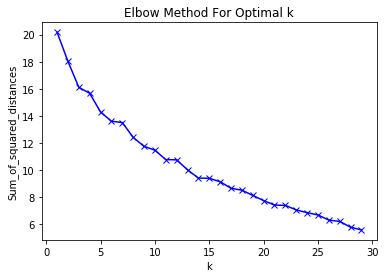

In [264]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [266]:
toronto_merged = toronto_data
# add clustering labels
toronto_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,1,Fast Food Restaurant,Yoga Studio,Eastern European Restaurant,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store,Hardware Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Diner,Dim Sum Restaurant,Dessert Shop,Department Store
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,1,Bar,Construction & Landscaping,Yoga Studio,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Discount Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Dog Run,Diner,Filipino Restaurant,Dim Sum Restaurant
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,12,Rental Car Location,Pizza Place,Electronics Store,Breakfast Spot,Medical Center,Mexican Restaurant,Yoga Studio,Drugstore,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Dumpling Restaurant,Diner,Empanada Restaurant,Ethiopian Restaurant,Event Space,Discount Store,Dessert Shop,Dim Sum Restaurant
3,M1G,Scarborough,Woburn,43.770992,-79.216917,3,Coffee Shop,Korean Restaurant,Yoga Studio,Electronics Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Diner,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Discount Store,Dim Sum Restaurant,Filipino Restaurant
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,3,Athletics & Sports,Hakka Restaurant,Fried Chicken Joint,Caribbean Restaurant,Thai Restaurant,Bakery,Bank,Drugstore,Doner Restaurant,Donut Shop,Dumpling Restaurant,Discount Store,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Dog Run


In [267]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], \
                                  toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters